# Generating understanding of movie genres and Studios for Microsoft

## Business Understanding
### Introduction
Microsoft Corporation is a  technology company based in the United States.
The main services they offer is Microsoft Windows operating system 



## Problem Statement
Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. The company needs to know what types of films are currently doing the best at the box office therefore  making informed decisions that the head of Microsoft's new movie studio can use to help decide what type of films to create.


## Main Objective

By analyzing the prevailing Box Office and IMDB performance, we can have better understanding about audience preferences and tailor our movie production  accordingly. These insights will guide decision-making processes which will result to success of the movie production.

## Experimental Design
- Data Collection
- Read and check the data
- Cleaning the data
- Exploratory Data Analysis
- Conclusions and Recommendations

## Data Understanding

The data utilized for analysis is sourced from two tables within the `im.db` database and the `bom.movie_gross.csv` file. These tables provide relevant information for the analysis process:

    * movie_basics
    * movie_ratings

The "movie_basics" table comprises 146,144 rows and includes six columns. It provides information about various movie attributes such as movie_id, primary_title and original_title, start_year, runtime_minutes and genre.

On the other hand, the "movie_ratings" table contains 73,856 rows and consists of three columns. This table contains data related to the ratings received by the movies, including average rating, number of votes, and movie ID.

By leveraging the data from these two tables, we can gain insights into the movie attributes and ratings, allowing for comprehensive analysis and informed decision-making in the movie industry.

The 'bom.movie_gross.csv' dataset consists of 3387 rows and encompasses five columns. These columns contain valuable information including the studio name, year, title, domestic gross, and foreign gross.

## Importing Libraries

In [1]:
# importing relevant libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import numpy as np
import sqlite3

## Reading the Data

In [2]:
# Connecting the Database
conn = sqlite3.connect('im.db')

In [3]:
# Checking the names of the tables
pd.read_sql("""
            SELECT name 
            FROM sqlite_master 
            WHERE type = 'table'
            """, conn)

,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


In [4]:
# Previewing the movie_basics table to familiarize with the fields

pd.read_sql("SELECT * FROM movie_basics;", conn)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [5]:
# Previewing the movie_ratings table
pd.read_sql(
    '''
    SELECT *
    FROM movie_ratings;
    '''
    , conn)

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [6]:
# Joining the two tables to get more info about them 

df = pd.read_sql(
    '''
    SELECT *
    FROM movie_basics
    JOIN movie_ratings
    USING (movie_id)
    '''
    , conn)

print(df.shape)
df.head()

(73856, 8)


,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


In [7]:
bom_df = pd.read_csv('zippedData/bom.movie_gross.csv.gz')
print(bom_df.shape)
bom_df.head()

(3387, 5)


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


## Data Wrangling

In [8]:
# Checking for missing values in the df
df.isna().sum()

movie_id              0
primary_title         0
original_title        0
start_year            0
runtime_minutes    7620
genres              804
averagerating         0
numvotes              0
dtype: int64

In [9]:
bom_df.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

### Dropping Rows

In [10]:
# Dropping rows that contain empty genres and checking the shape
df.dropna(subset=['genres'], inplace=True)
df.shape

(73052, 8)

In [11]:
# Checking whether there is any empty genres in the dataframe
df['genres'].isna().sum()

0

In [12]:
# Dropping rows that contain empty studio and domestic_gross because they wont affect the overall data and checking the shape
bom_df.dropna(subset=['domestic_gross', 'studio'], inplace=True)
bom_df.shape

(3356, 5)

### Imputing the runtime_minutes columns

In [13]:
# Checking the max time and min time
df['runtime_minutes'].max(), df['runtime_minutes'].min()

(51420.0, 3.0)

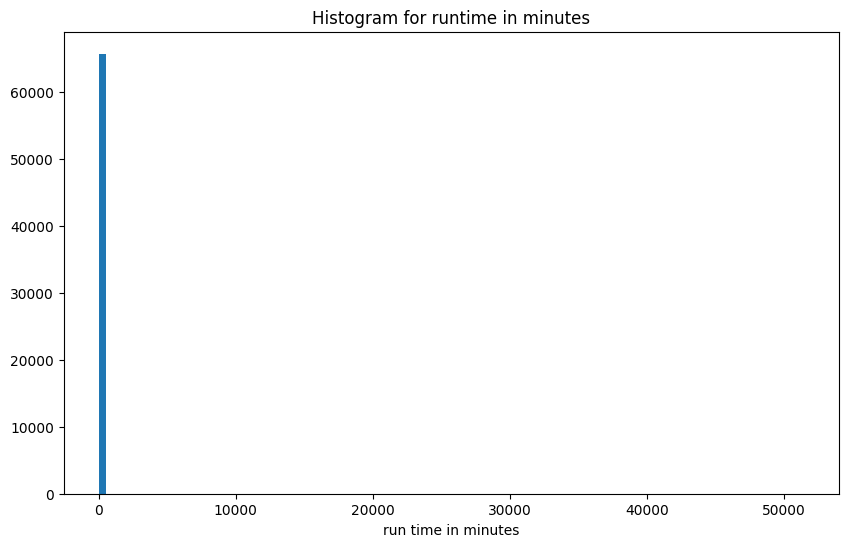

In [14]:
# Plot a histogram to see if the data is positive or negatively skewed
fig, ax = plt.subplots(figsize=(10,6))

# Creating the histogram
x = df['runtime_minutes']
ax.hist(x, bins=100)
ax.set_title("Histogram for runtime in minutes")
ax.set_xlabel("run time in minutes")
plt.show()

As seen by the histogram the data is positively skewed and has a maximum time of 51420 minutes and mininum time of 3 minutes. Because the data is positively skewed it is optimale to median in this because of the large outlier of the maximum time which will greatly affect the mean of the data

In [15]:
# Choose median to fill to missing values because of the outliers in data would greatly affect the mean 
df['runtime_minutes'].fillna(df['runtime_minutes'].median(), inplace=True)

In [16]:
# Checking of all the changes have been made
df.isna().sum()

movie_id           0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
averagerating      0
numvotes           0
dtype: int64

### Imputing the foreign gross column from bom_df

In [17]:
# Checking the data types of the columns
bom_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3356 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3356 non-null   object 
 1   studio          3356 non-null   object 
 2   domestic_gross  3356 non-null   float64
 3   foreign_gross   2007 non-null   object 
 4   year            3356 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 157.3+ KB


In [18]:
# Remove commas from the 'foreign_gross' column
bom_df['foreign_gross'] = bom_df['foreign_gross'].str.replace(',', '')

# Convert the 'foreign_gross' column to float
bom_df['foreign_gross'] = bom_df['foreign_gross'].astype('float64')

# Checking if the changes have been made
bom_df['foreign_gross'].info()

<class 'pandas.core.series.Series'>
Index: 3356 entries, 0 to 3386
Series name: foreign_gross
Non-Null Count  Dtype  
--------------  -----  
2007 non-null   float64
dtypes: float64(1)
memory usage: 52.4 KB


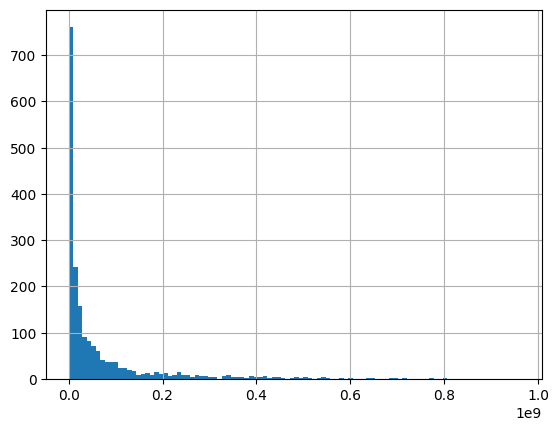

In [19]:
bom_df['foreign_gross'].hist(bins=100)
plt.show()

As seen in the histogram the data is positively skewed. Because the data is positively skewed it is optimale to median in this because of the large outlier of the maximum time which will greatly affect the mean of the data

In [20]:
bom_df['foreign_gross'].fillna(bom_df['foreign_gross'].median(), inplace=True)

In [21]:
# Checking if there is any more missing values
bom_df.isna().sum()

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

### Checking for duplicates

In [22]:
duplicates = df.duplicated()

# Checking if there are any duplicates
if duplicates.any():
    print("Duplicates found in the DataFrame.")
else:
    print("No duplicates found in the DataFrame.")

No duplicates found in the DataFrame.


In [23]:
duplicates1 = bom_df.duplicated()

# Checking if there are any duplicates
if duplicates1.any():
    print("Duplicates found in the DataFrame.")
else:
    print("No duplicates found in the DataFrame.")

No duplicates found in the DataFrame.


## Exploratory Data Analysis

### Breaking down the Genres Column

In [24]:
# Split the genres into individual columns
df['Genres'] = df['genres'].str.split(',')
# By applying the explode() method to the 'Genres' column, each element within the lists is expanded, resulting in individual rows for each value.
df = df.explode('Genres')

In [25]:
# Checking the changes done to the dataframe
df.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,Genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,Action
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,Crime
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,Drama
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43,Biography
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43,Drama


In [26]:
# Check the Genres in the dataframe using a frequency table
df['Genres'].value_counts()

Genres
Drama          30788
Documentary    17753
Comedy         17290
Thriller        8217
Horror          7674
Action          6988
Romance         6589
Crime           4611
Adventure       3817
Biography       3809
Family          3412
Mystery         3039
History         2825
Sci-Fi          2206
Fantasy         2126
Music           1968
Animation       1743
Sport           1179
War              853
Musical          721
News             579
Western          280
Reality-TV        17
Adult              3
Game-Show          2
Short              1
Name: count, dtype: int64

## Dropping genres with a low count in the frequency table

In [27]:
irrelevant_fields = [
    "Short", "Game-Show", "Adult", "Reality-TV", "Western", "News", "Musical", "War"
]
df = df.drop(df[df['Genres'].isin(irrelevant_fields)].index)
df['Genres'].value_counts()

Genres
Drama          29858
Comedy         16986
Documentary    16865
Thriller        8129
Horror          7617
Action          6802
Romance         6421
Crime           4563
Adventure       3741
Biography       3704
Family          3307
Mystery         3014
History         2457
Sci-Fi          2175
Fantasy         2078
Music           1902
Animation       1717
Sport           1173
Name: count, dtype: int64

To exclude genres with low frequency from the DataFrame, which may not provide an accurate representation of their ratings for example:

Removing genres with low frequency is essential for obtaining reliable ratings. For instance, genres like 'Short' with a count of 1 may produce misleading insights, whereas genres like 'Drama' with a count of 29858 offer a more meaningful representation. By eliminating low frequency genres, we can ensure that the remaining data provides a more accurate expression of ratings.

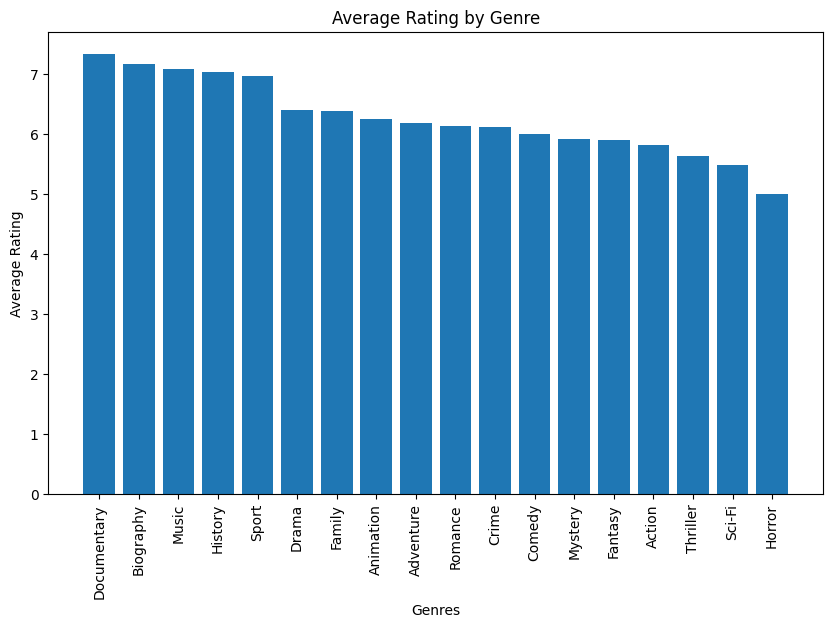

In [28]:
# Group the data by genre and calculate the average rating for each genre
genre_ratings = df.groupby('Genres')['averagerating'].mean().sort_values(ascending=False)

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(genre_ratings.index, genre_ratings.values)
plt.xlabel('Genres')
plt.ylabel('Average Rating')
plt.title('Average Rating by Genre')
plt.xticks(rotation=90)
plt.show()

## Conclusion

- Based on the analysis,documentaries, biographies, music films and sports have achieved the highest average ratings making it easy to know what the audience prefers.
This insights will help the studio know what genres to focus on.


### Grouping domestic and foreign gross

In [29]:
# Grouping the data to allow for easy comparison among Studios
gross_summary = bom_df.groupby('studio')[['domestic_gross', 'foreign_gross']].mean().sort_values(by=['domestic_gross', 'foreign_gross'], ascending=False)
gross_summary

,domestic_gross,foreign_gross
studio,,
BV,1.737644e+08,2.437043e+08
P/DW,1.682900e+08,3.393600e+08
WB (NL),8.879333e+07,1.412978e+08
Uni.,8.777138e+07,1.150542e+08
WB,8.691461e+07,1.347279e+08
...,...,...
Hiber,3.600000e+03,1.940000e+07
Shout!,2.800000e+03,3.275000e+07
ALP,2.800000e+03,1.940000e+07


### Plotting the top 5 Studios 

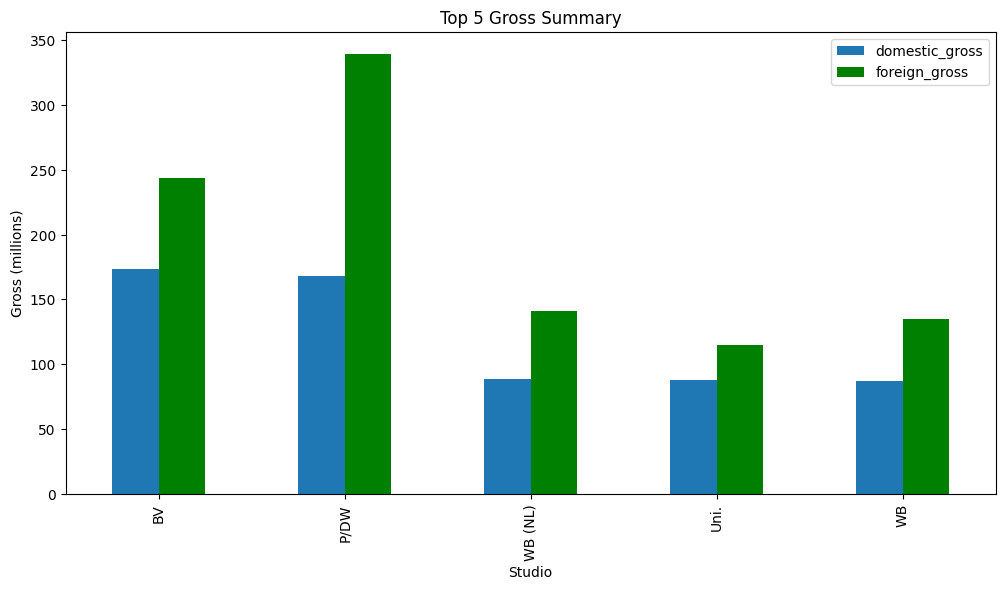

In [30]:
fig, ax = plt.subplots(figsize=(12, 6))

# Plot 'domestic_gross' and 'foreign_gross' together with different colors
gross_summary[['domestic_gross', 'foreign_gross']][:5].plot.bar(ax=ax, color=['C0', 'green'])

# Set x-axis tick labels
ax.set_xticklabels(gross_summary.index[:5])

# Add labels and title
ax.set_xlabel('Studio')
ax.set_ylabel('Gross (millions)')  # Updated y-axis label

# Convert y-axis tick labels to millions
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, pos: f'{x/1000000:.0f}'))

ax.set_title('Top 5 Gross Summary')
plt.xticks(rotation=90)

plt.show()

## Conclusion
- Both BV Studio and P/DW Studio achieved the highest gross earnings. BV Studio earned more domestically, while P/DW Studio earned more from foreign markets.


## Recommendations
* The new Microsoft movie studio should prioritize genres such as documentaries, biographies, music, and sports, since these have  high ratings and audiences will get satisfaction.

* The new studio should try and borrow the strategy from both BV and P/DW studios since they have highest earnings and this will ensure the success of the new studio. 
